## Apply HDBSCAN

In [1]:
import os, glob, getpass, sys
import warnings
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn, unique
from astropy.utils.exceptions import AstropyWarning

user = getpass.getuser()
sys.path.append('/Users/' + user + '/Dropbox/my_python_packages')
from gaia.cluster_eps import EPS
from gaia.cluster_hdbscan import Hdbscan as Hdbscan
import itertools

from astropy.visualization import hist

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
# Make Plot =================================================
def hdb_plot(clusters, mCls_s, scaler, ftsize = 18):
    fig = plt.figure(figsize=[10,7])

    plt.xlabel('Min Cluster Size', fontsize = ftsize)
    plt.ylabel('Cluster members',  fontsize = ftsize)
    plt.xticks(fontsize = ftsize)
    plt.yticks(fontsize = ftsize)

    # Apply selection ====
    lengths = [cluster.len for cluster in clusters]
    els     = np.where(np.array(lengths) > 350)[0]
    xcoords = [mCls_s[el]  for el in els]
    ycoords = [lengths[el] for el in els]

    plt.plot(xcoords, ycoords,   'ko', label = 'Cl Members')
    plt.show()        
    fig.savefig('hdbscan_scaler_test_' + scaler + '_cutted.pdf', bbox_inches = 'tight', overwrite = True)

    print(f'Min.  elements: {np.min(ycoords)}')
    print(f'Max.  elements: {np.max(ycoords)}')
    print(f'Mean. elements: {np.mean(ycoords):5.0f} +/- {np.std(ycoords):3.0f}')
    
    

def hdb_run(data_inp, data_inp_scl, scaler, Prob = 0.99, ftsize = 18):    
    clusters = []
    mCls_s   = [inp for inp in range(20,70,1)]

    print('Searchikg for Cluster members with Membership Probability: >', np.round(Prob*100), '%')
    print('')

    # Loop through mCls ============================
    for mCls in mCls_s:
        hdb = Hdbscan()
        hdb.load(data=data_inp, data_scl=data_inp_scl)
        hdb.run_hdbscan(min_cluster_size = mCls, min_samples = None)

        hdb.get_clusters(verbose = False)
        if len(hdb.cl_lengths) > 0:
            cl_max_i = np.argmax(hdb.cl_lengths)  # Select largest cluster
            hdb.apply_probability(probability = Prob)
            hdb.get_clusters(verbose = False)
            cluster_max       = hdb.cl_array[cl_max_i]
            cluster_max.len   = len(cluster_max)
            cluster_max.mcls  = mCls
            cluster_max.label = 'mCls = ' + np.str(cluster_max.mcls)

            clusters.append(cluster_max)

    pdf_fig =  hdb_plot(clusters, mCls_s, ftsize = ftsize, scaler=scaler)            

# Read and scale the data

In [3]:
# Read real data ===============================
warnings.simplefilter('ignore', AstropyWarning)
path     = '/Users/' + user + '/Dropbox/Public/clustering_oph/'
data     = Table.read(path + 'sample_gaia/gaia_sample_cleaned.vot',  format = 'votable')
scl_cols = ['X', 'Y', 'Z', 'pmdec', 'pmra']
data_inp = data[scl_cols]

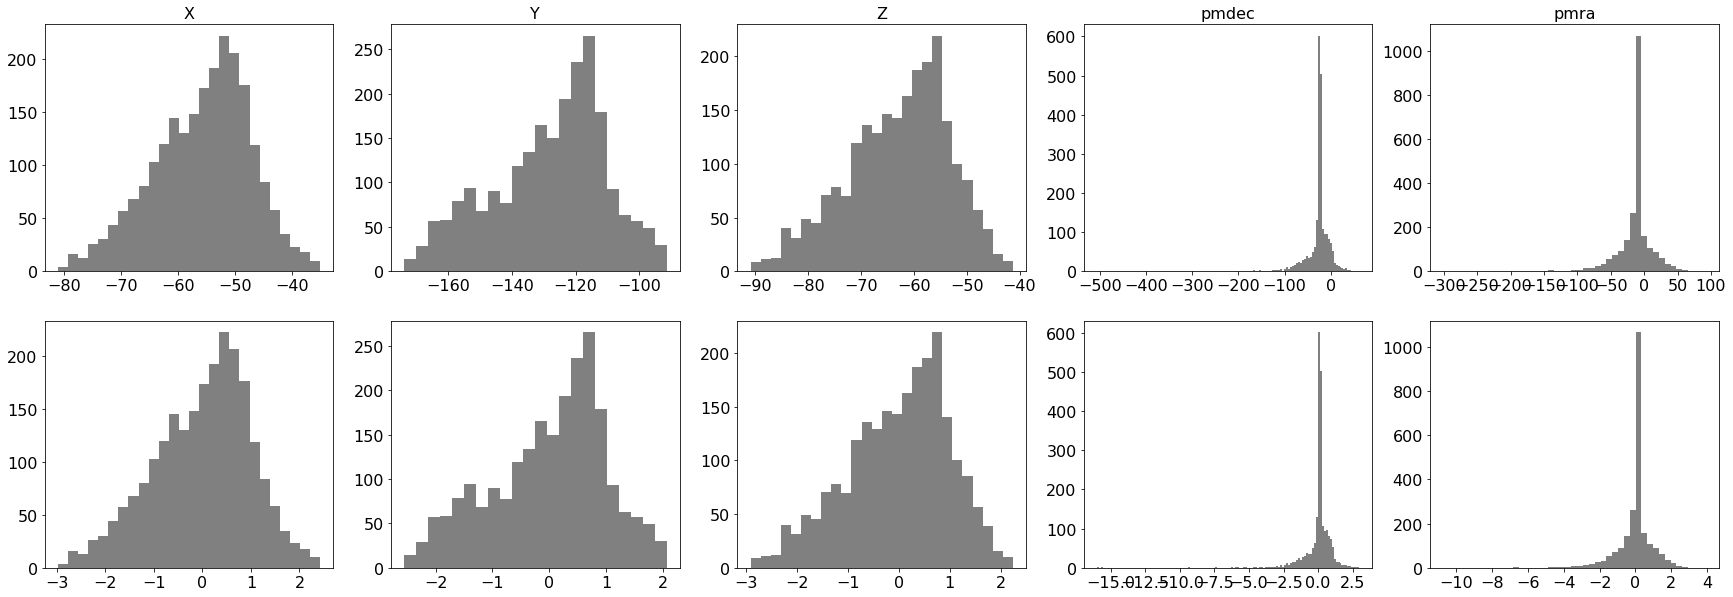

Searchikg for Cluster members with Membership Probability: > 99.0 %



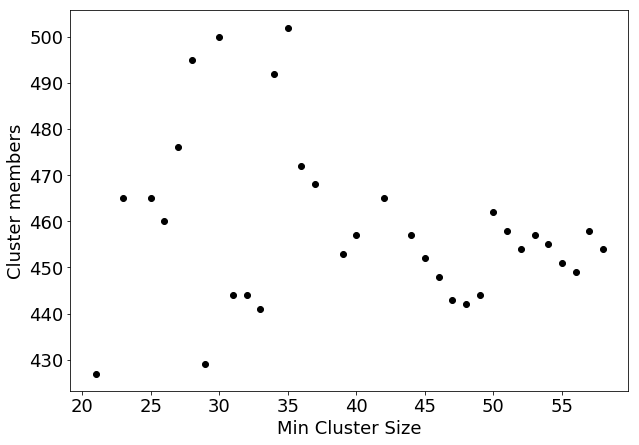

Min.  elements: 427
Max.  elements: 502
Mean. elements:   459 +/-  18


In [4]:
# Scale data with Standard Scaler ==============
inp_dat   = data_inp.copy()
scaler    = 'standard'
data_x    =  EPS()
data_x.load_data_tb(inp_dat)
data_x.scl_data(scaler_mode = scaler)
data_x.plot_distributions(pdf_name='scl_' + scaler + '.pdf')

hdb_run(inp_dat, data_x.data_scl, scaler, Prob = 0.99, ftsize = 18)

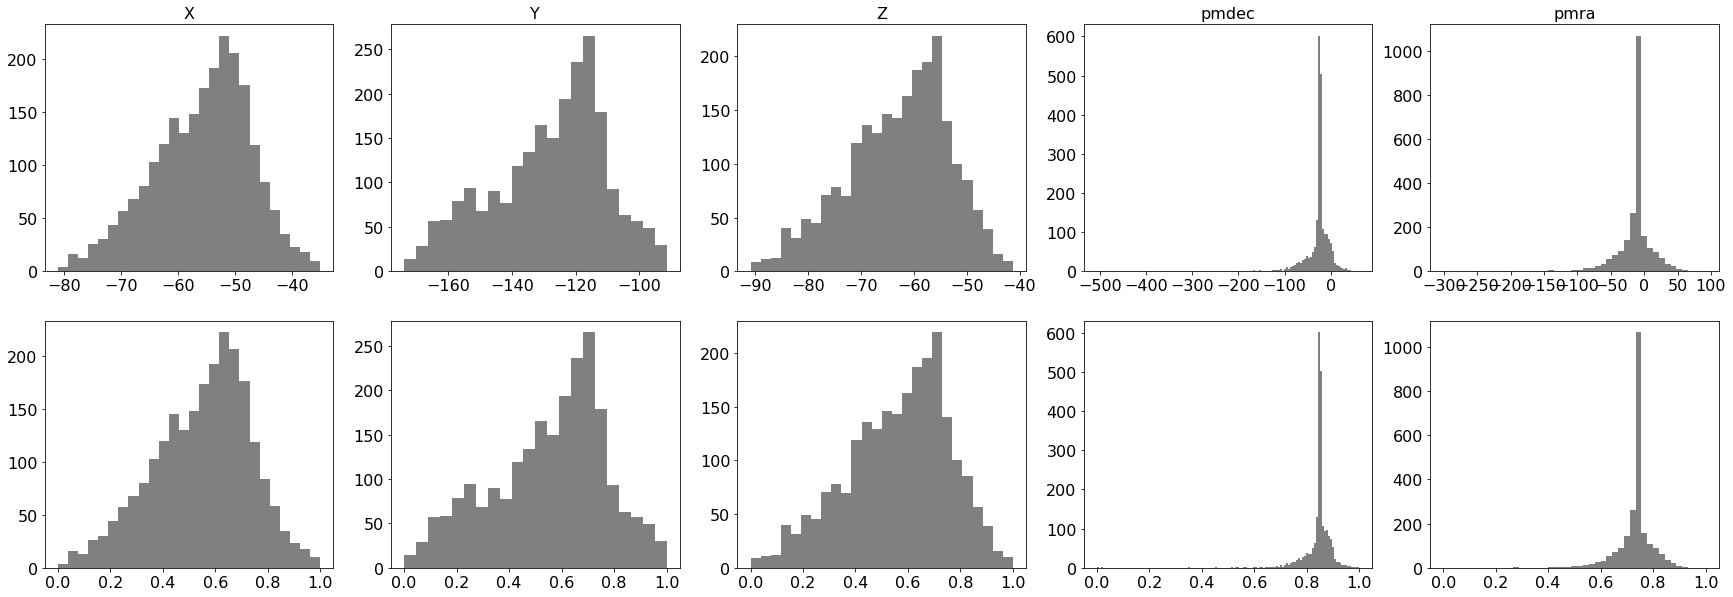

Searchikg for Cluster members with Membership Probability: > 99.0 %



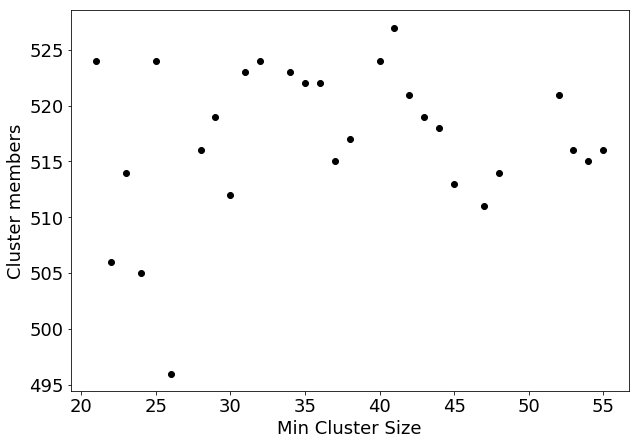

Min.  elements: 496
Max.  elements: 527
Mean. elements:   517 +/-   7


In [5]:
# Scale data with Min/Max Scaler ===============
inp_dat   = data_inp.copy()
scaler    = 'minmax'
data_x    =  EPS()
data_x.load_data_tb(inp_dat)
data_x.scl_data(scaler_mode = scaler)
data_x.plot_distributions(pdf_name='scl_' + scaler + '.pdf')

hdb_run(inp_dat, data_x.data_scl, scaler, Prob = 0.99, ftsize = 18)

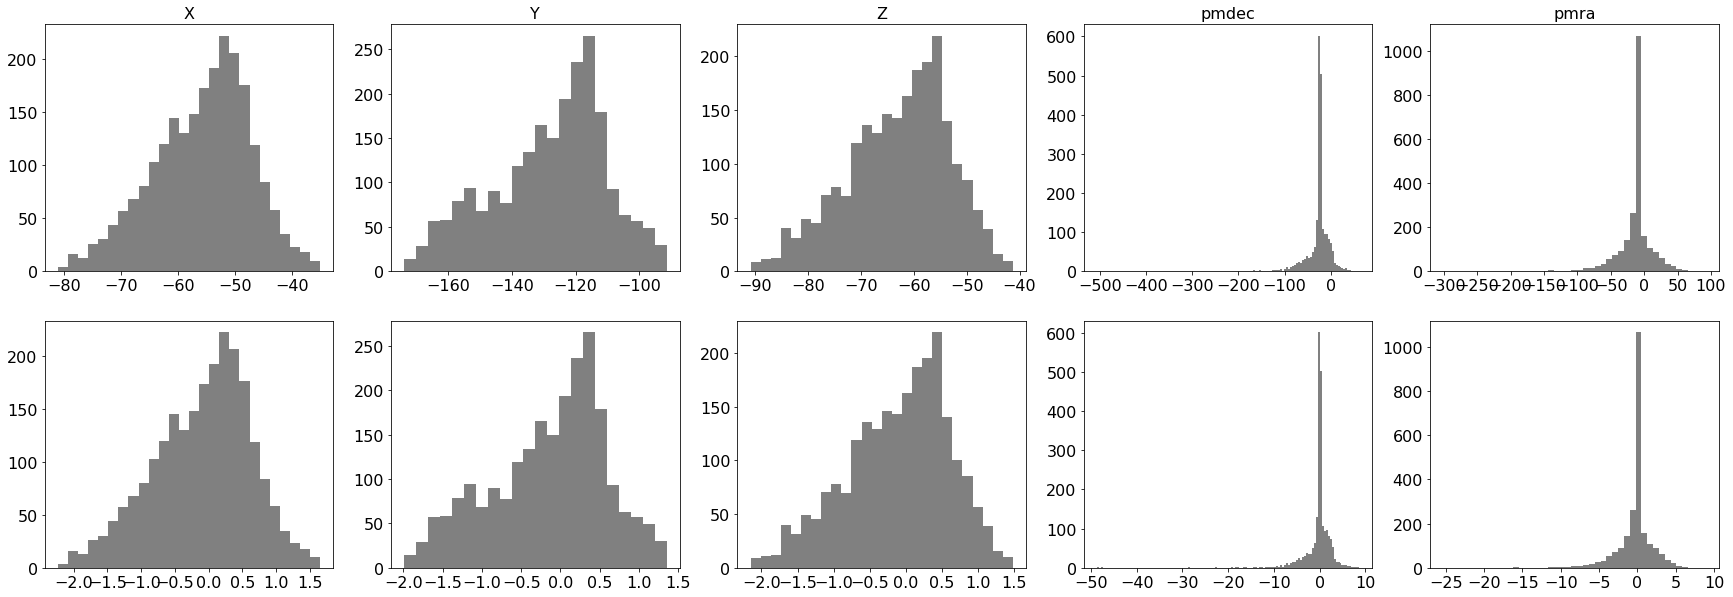

Searchikg for Cluster members with Membership Probability: > 99.0 %



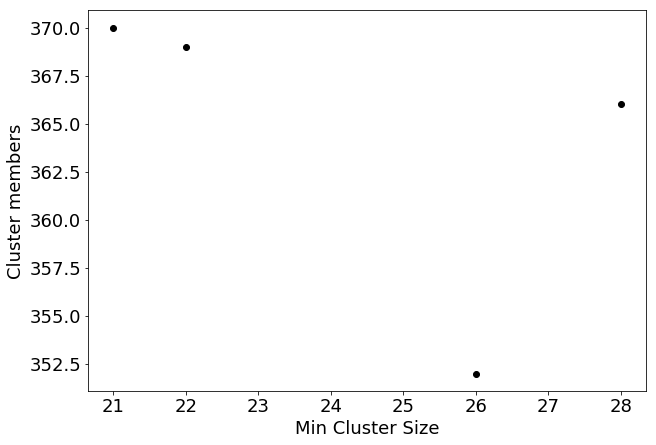

Min.  elements: 352
Max.  elements: 370
Mean. elements:   364 +/-   7


In [6]:
# Scale data with Robust Scaler ================
inp_dat   = data_inp.copy()
scaler    = 'robust'
data_x    =  EPS()
data_x.load_data_tb(inp_dat)
data_x.scl_data(scaler_mode = scaler)
data_x.plot_distributions(pdf_name='scl_' + scaler + '.pdf')

hdb_run(inp_dat, data_x.data_scl, scaler, Prob = 0.99, ftsize = 18)